# K-Means Clustering Assignments

**Student ID:** 63130500102

**Student Name:** Wongsakorn Saengsurasak

---

## Assignment 1: Clustering Synthetic Data 2D Using Silhouette Coefficient

### Objective:
Understand the concept of K-means clustering and determine the optimal number of clusters using the Silhouette Coefficient.

### Tasks:
1. Generate a synthetic 2D dataset with 4-5 distinct clusters using libraries like `sklearn.datasets.make_blobs`.
2. Visualize the dataset using a scatter plot.
3. Implement K-means clustering for a range of cluster numbers (e.g., 2 to 10).
4. For each cluster number, compute the Silhouette Coefficient.
5. Plot the Silhouette Coefficient values against the number of clusters to visualize the optimal number of clusters.
6. Visualize the clusters for the optimal number of clusters using a scatter plot.
7. Write a brief report discussing your findings.

---

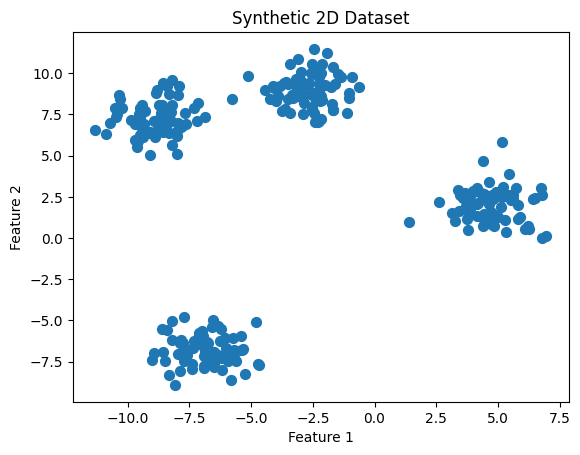

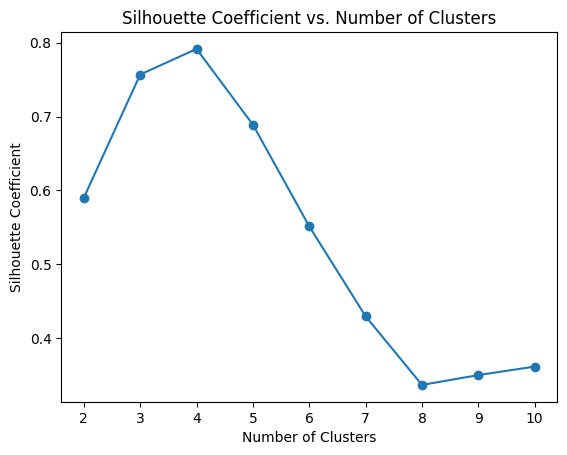

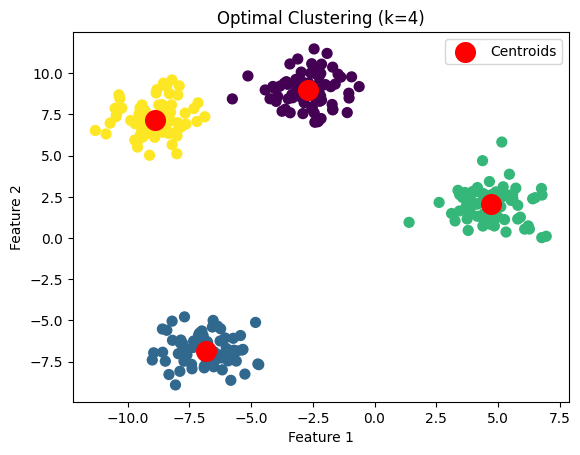

In [77]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Suppress FutureWarnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Step 1: Generate synthetic dataset
n_samples = 300
n_features = 2
n_clusters = 4
random_state = 42
X, _ = make_blobs(n_samples=n_samples, n_features=n_features, centers=n_clusters, random_state=random_state)

# Step 2: Visualize the dataset
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.title("Synthetic 2D Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Step 3 & 4: Implement K-means and compute Silhouette Coefficient
range_clusters = range(2, 11)
silhouette_scores = []

for n_clusters in range_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)  # n_init is set to default (10)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Step 5: Plot Silhouette Coefficients
plt.plot(range_clusters, silhouette_scores, marker='o')
plt.title("Silhouette Coefficient vs. Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.xticks(range_clusters)
plt.show()

# Step 6: Visualize clusters for the optimal number of clusters
optimal_num_clusters = np.argmax(silhouette_scores) + 2  # +2 because range starts from 2
kmeans_optimal = KMeans(n_clusters=optimal_num_clusters, random_state=random_state)
optimal_cluster_labels = kmeans_optimal.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=optimal_cluster_labels, s=50, cmap='viridis')
plt.scatter(
    kmeans_optimal.cluster_centers_[:, 0],
    kmeans_optimal.cluster_centers_[:, 1],
    s=200,
    c='red',
    label='Centroids'
)
plt.title(f"Optimal Clustering (k={optimal_num_clusters})")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

### สรุป Assignment 1:
จาก Assignment 1 พบว่าข้อมูลที่สร้างขึ้นมาจัดกลุ่มโดยใช้ Kmeans พบว่า k = 4 ให้ผลดีที่สุด เมื่อดูจากค่า Silhouette Coefficient สูงสุด (จุดที่สูงที่สุดบนกราฟ) 

---

## Assignment 2: Clustering Synthetic Data 2D Using Inertia

### Objective:
Understand the concept of K-means clustering and determine the optimal number of clusters using inertia.

### Tasks:
1. Generate a synthetic 2D dataset with 4-5 distinct clusters using libraries like `sklearn.datasets.make_blobs`.
2. Visualize the dataset using a scatter plot.
3. Implement K-means clustering for a range of cluster numbers (e.g., 2 to 10).
4. For each cluster number, compute the inertia.
5. Plot the inertia values against the number of clusters to visualize the "elbow" point.
6. Visualize the clusters for the optimal number of clusters using a scatter plot.
7. Write a brief report discussing your findings.

---

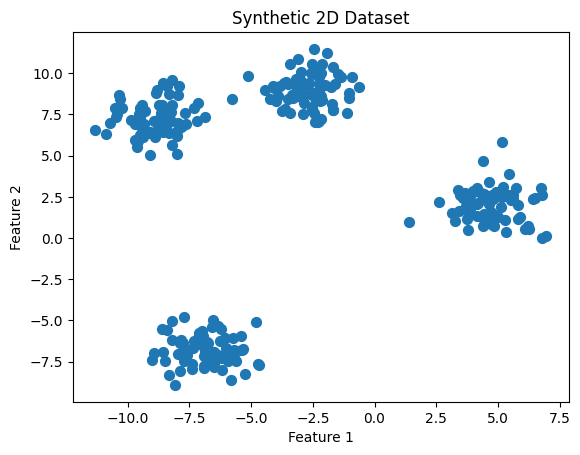

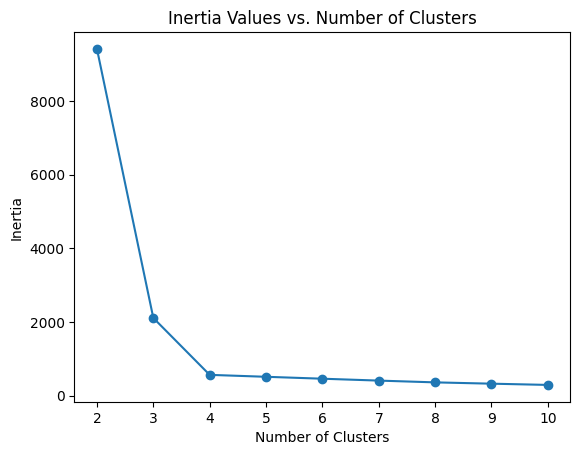

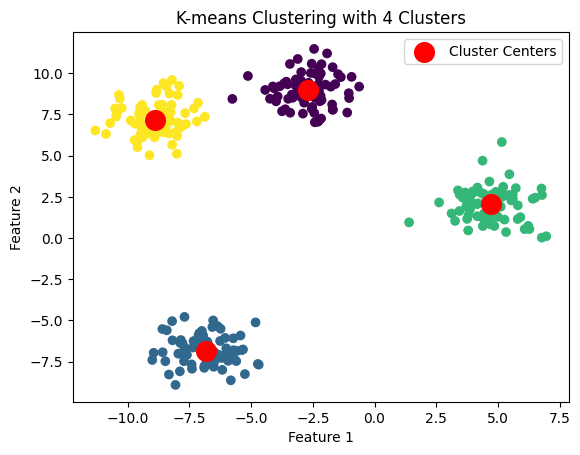

In [78]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Step 1: Generate synthetic dataset
n_samples = 300
n_features = 2
n_clusters = 4
random_state = 42

X, y = make_blobs(n_samples=n_samples, n_features=n_features, centers=n_clusters, random_state=random_state)

# Step 2: Visualize the dataset using a scatter plot
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.title("Synthetic 2D Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


# Step 3 & 4: Implement K-means and compute inertia
inertia_values = []
cluster_range = range(2, 11)

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

# Step 5: Plot inertia values against the number of clusters
plt.plot(cluster_range, inertia_values, marker='o')
plt.title("Inertia Values vs. Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.xticks(cluster_range)
plt.show()

# Step 6: Visualize clusters for the optimal number of clusters
optimal_n_clusters = 4  # Based on the "elbow" point from the inertia plot
kmeans_optimal = KMeans(n_clusters=optimal_n_clusters, random_state=random_state)
y_pred = kmeans_optimal.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis')
plt.scatter(kmeans_optimal.cluster_centers_[:, 0], kmeans_optimal.cluster_centers_[:, 1], s=200, c='red', label='Cluster Centers')
plt.title(f"K-means Clustering with {optimal_n_clusters} Clusters")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

### สรุป Assignment 2:
จาก Assignment 2 พบว่าข้อมูลที่สร้างขึ้นมาจัดกลุ่มโดยใช้ Kmeans พบว่า k = 4 ให้ผลดีที่สุด เมื่อดูจากจุดที่ค่า Inertia ที่เริ่มไม่ลดลงเรื่อยๆ (elbow point)

---

## Assignment 3: Segmenting Patients

### Objective:
Segment patients based on selected health metrics.

### Dataset Suggestion:
Diabetes dataset from UCI Machine Learning Repository.

### Tasks:
1. Load the diabetes dataset.
2. Perform exploratory data analysis to understand the features and distributions.
3. Select two features that seem most relevant or interesting for clustering (e.g., glucose levels and age).
4. Visualize the selected features using a scatter plot.
5. Implement K-means clustering for a range of cluster numbers.
6. Determine the optimal number of clusters using either the Silhouette Coefficient or inertia.
7. Visualize the clusters using a scatter plot.
8. Analyze the characteristics of each cluster to understand the segmentation.
9. Write a report discussing the patient segments based on the selected features, potential implications, or uses of these segments in healthcare.

---

In [79]:
# 1. Load the diabetes dataset.
from sklearn.datasets import load_diabetes
import pandas as pd

diabetes = load_diabetes()
data = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)

In [80]:
# 2. Perform exploratory data analysis to understand the features and distributions.
# Display basic information about the dataset
print(data.info())

# Display summary statistics
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB
None
                age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.123988e-01 -1.267807e-01   
25%   -3.

In [81]:
# 3. Select two features that seem most relevant or interesting for clustering (e.g., glucose levels and age).
selected_features = ['age', 'bmi']
X = data[selected_features]

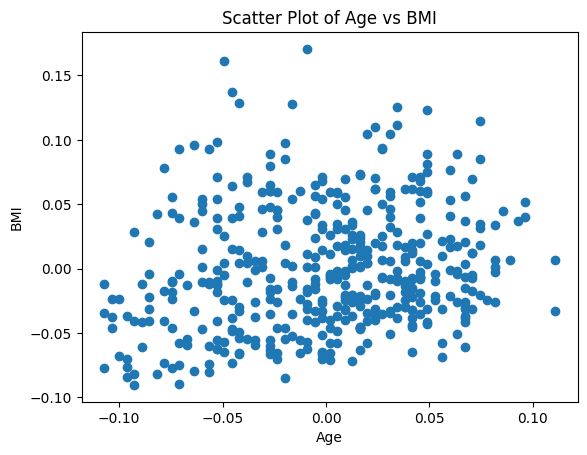

In [82]:
# 4. Visualize the selected features using a scatter plot.
import matplotlib.pyplot as plt

plt.scatter(X['age'], X['bmi'])
plt.xlabel('Age')
plt.ylabel('BMI')
plt.title('Scatter Plot of Age vs BMI')
plt.show()

In [83]:
# 5. Implement K-means clustering for a range of cluster numbers.
from sklearn.cluster import KMeans
import numpy as np

# Range of cluster numbers to try
cluster_range = range(2, 11)
inertia_values = []

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

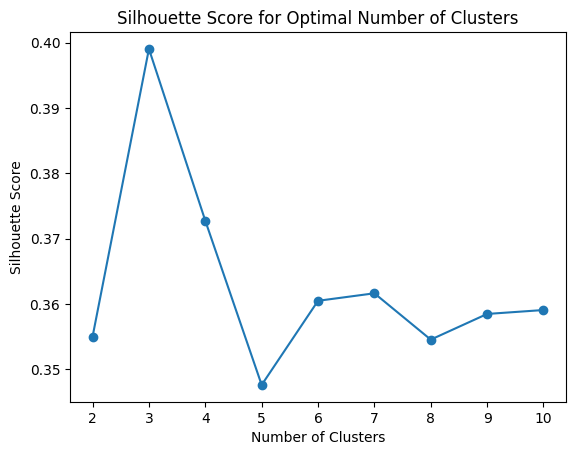

In [84]:
# 6.1. Determine the optimal number of clusters using either the Silhouette Coefficient or inertia
from sklearn.metrics import silhouette_score

silhouette_scores = []
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot Silhouette scores
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal Number of Clusters')
plt.show()

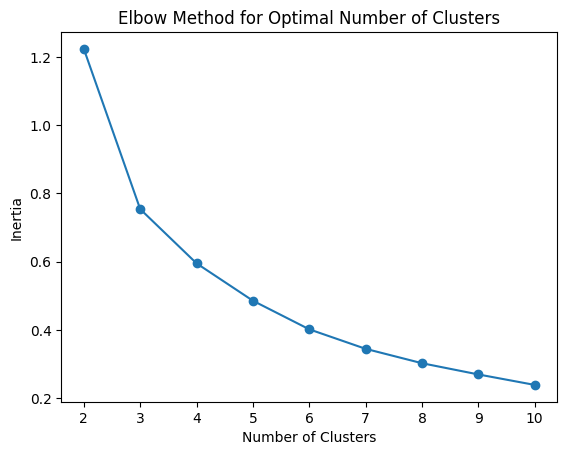

In [85]:
# 6.2. Determine the optimal number of clusters using the Elbow Method (inertia)
plt.plot(cluster_range, inertia_values, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

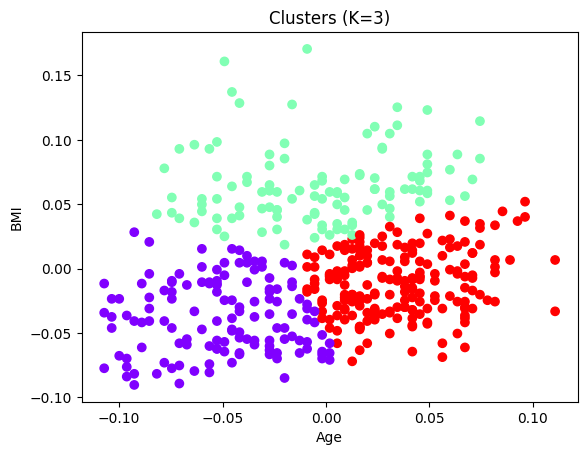

In [86]:
# 7. Visualize the clusters using a scatter plot.
optimal_n_clusters = 3  # Choose based on the elbow method
kmeans = KMeans(n_clusters=optimal_n_clusters)

# Create a deep copy of the DataFrame
X_copy = X.copy()

# Fit and predict using the copy
X_copy['cluster'] = kmeans.fit_predict(X_copy)

plt.scatter(X_copy['age'], X_copy['bmi'], c=X_copy['cluster'], cmap='rainbow')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.title(f'Clusters (K={optimal_n_clusters})')
plt.show()

In [87]:
# 8. Analyze the characteristics of each cluster to understand the segmentation.
# Calculate the mean values of features within each cluster
cluster_means = X_copy.groupby('cluster').mean()

# Print the cluster characteristics
print(cluster_means)

              age       bmi
cluster                    
0       -0.049655 -0.037724
1       -0.003682  0.064609
2        0.034991 -0.011015


### สรุป Assignment 3:
จาก Assignment 3 พบว่าข้อมูลที่สร้างขึ้นมาจัดกลุ่มโดยใช้ Kmeans พบว่า k = 3 ให้ผลดีที่สุด เมื่อดูจากค่า Silhouette Coefficient และ Inertia

จากด้านบนจะเป็นการวิเคราะห์ Diabetes dataset โดยใช้การจัดกลุ่ม Kmeans เพื่อระบุกลุ่มผู้ป่วยที่แตกต่างกันตาม age และ bmi ที่เลือกไว้ 

โดย Silhouette Coefficient และ Inertia สามารถช่วยให้เราตัดสินใจจำนวนกลุ่มที่เหมาะสมสำหรับชุดข้อมูลได้

กราฟค่า Silhouette Coefficient ให้ดูจากค่า Silhouette Coefficient สูงสุด (จุดที่สูงที่สุดบนกราฟ)

กราฟค่า Inertia ให้ดูจากจุดที่ค่า Inertia ที่เริ่มไม่ลดลงเรื่อยๆ (elbow point)

ทั้งสองกราฟชี้ให้เห็นว่าจำนวน Cluster ที่เหมาะสมที่สุดก็คือ 4 Cluster นั่นเอง

---

## Assignment 4: Clustering Penguins and Evaluating with External Measure

### Objective:
Cluster the penguin dataset and evaluate the clustering results using an external measure.

### Dataset:
Palmer Penguins dataset, available in the `seaborn` library or on GitHub.

### Tasks:
1. Load the Palmer Penguins dataset.
2. Perform exploratory data analysis to understand the features and distributions.
3. Preprocess the data: handle missing values, encode categorical variables, and normalize the data.
4. Implement K-means clustering.
5. Determine the optimal number of clusters using either the Silhouette Coefficient or inertia.
6. Visualize the clusters using appropriate visualization techniques.
7. Use an external measure (e.g., Adjusted Rand Index, Normalized Mutual Information) to evaluate the clustering results against the true species labels.
8. Write a report discussing your findings, the effectiveness of the clustering, and the evaluation results using the external measure.

In [88]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score, normalized_mutual_info_score

# Load the Palmer Penguins dataset
penguins = pd.read_csv(
    "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")

# Perform exploratory data analysis
penguins.info()
penguins.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
count,344,344,342.000000,342.000000,342.000000,342.000000,333
unique,3,3,NaN,NaN,NaN,NaN,2
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,MALE
freq,152,168,NaN,NaN,NaN,NaN,168
mean,NaN,NaN,43.921930,17.151170,200.915205,4201.754386,NaN
std,NaN,NaN,5.459584,1.974793,14.061714,801.954536,NaN
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN
25%,NaN,NaN,39.225000,15.600000,190.000000,3550.000000,NaN
50%,NaN,NaN,44.450000,17.300000,197.000000,4050.000000,NaN
75%,NaN,NaN,48.500000,18.700000,213.000000,4750.000000,NaN


In [89]:
# Example data:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [90]:
# Pick the features
features = ["bill_length_mm", "flipper_length_mm"]

# Preprocess the data
# Fill in missing values with the mean
penguins.fillna(penguins.mean(numeric_only=True), inplace=True)

# Standardize the data (only the features)
penguins[features] = StandardScaler().fit_transform(penguins[features])
penguins["species"] = penguins["species"].astype("category").cat.codes

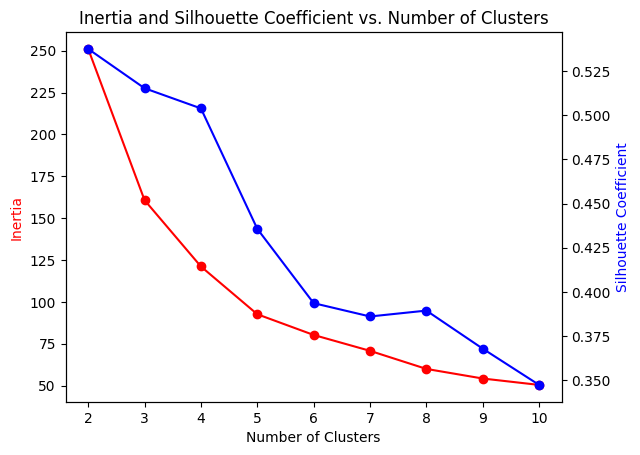

In [91]:
# Implement K-means clustering using both the inertia and the Silhouette Coefficient values
inertias = []
silhouette_coefficients = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init='auto', random_state=27)
    kmeans.fit(penguins[features])
    inertias.append(kmeans.inertia_)
    silhouette_coefficients.append(
        silhouette_score(penguins[features], kmeans.labels_))

# Plot both values for each number of clusters
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(range(2, 11), inertias, marker='o', color='r')
ax2.plot(range(2, 11), silhouette_coefficients, marker='o', color='b')
ax1.set_xlabel('Number of Clusters')
ax1.set_ylabel('Inertia', color='r')
ax2.set_ylabel('Silhouette Coefficient', color='b')
plt.title("Inertia and Silhouette Coefficient vs. Number of Clusters")
plt.show()

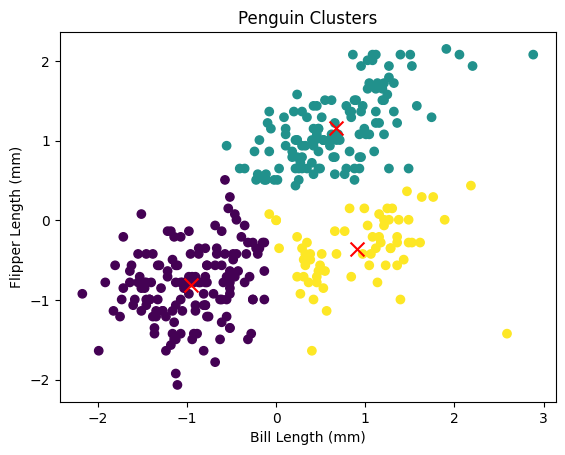

In [92]:
# The optimal number of clusters is 3
kmeans = KMeans(n_clusters=3, n_init='auto', random_state=27)
kmeans.fit(penguins[features])
labels = kmeans.labels_

# Visualize the clusters using a scatter plot
centroids = kmeans.cluster_centers_
penguins["cluster"] = labels
plt.scatter(penguins["bill_length_mm"],
            penguins["flipper_length_mm"], c=penguins["cluster"])
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=100, c='red')
plt.xlabel("Bill Length (mm)")
plt.ylabel("Flipper Length (mm)")
plt.title("Penguin Clusters")
plt.show()

In [93]:
# Evaluate the clustering results using Adjusted Rand Index
ari = adjusted_rand_score(penguins["species"], labels)
print("Adjusted Rand Index:", ari)

# Evaluate the clustering results using Normalized Mutual Information
nmi = normalized_mutual_info_score(penguins["species"], labels)
print("Normalized Mutual Information:", nmi)

Adjusted Rand Index: 0.8738316171645795
Normalized Mutual Information: 0.801576511945977


### สรุป Assignment 4:
The optimal number of clusters is 3 (another potential value is 4, but I tried that and it expectedly tanked both ARI and NIM scores)

The clustering results are effective because the high Adjusted Rand Index and Normalized Mutual Information scores. Which means that the clusters are similar to the actual species from the dataset. 

The clusters are somewhat loosely separated as shown in the plot. Both cohesion and separation can be improved in the future.

---